In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Creating dummies for categorical variable
from sklearn.linear_model import LinearRegression # Linear Regression from SKLEARN
import statsmodels.api as sm # Linear Regression from STATSMODEL
import warnings
warnings.filterwarnings('ignore')

In [276]:
data = pd.read_csv('store_sale_data.csv')

In [277]:
data.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36
2,2.62,2.0,1.0,1.0,1.0,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,67.20
3,11.73,3.0,1.0,1.0,3.0,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,60.87
4,4.82,2.0,1.0,1.0,3.0,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,86.79


In [278]:
data.shape

(51363, 16)

<AxesSubplot:>

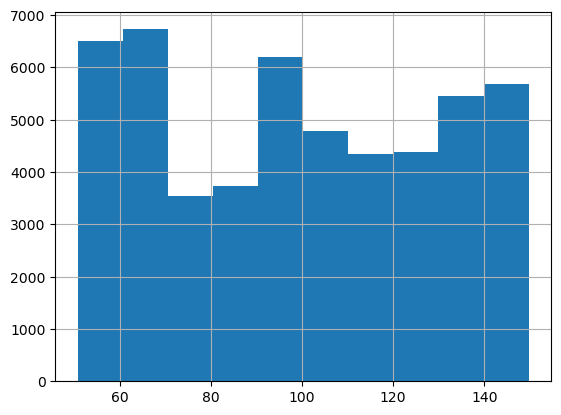

In [279]:
data['cost'].hist()

<AxesSubplot:>

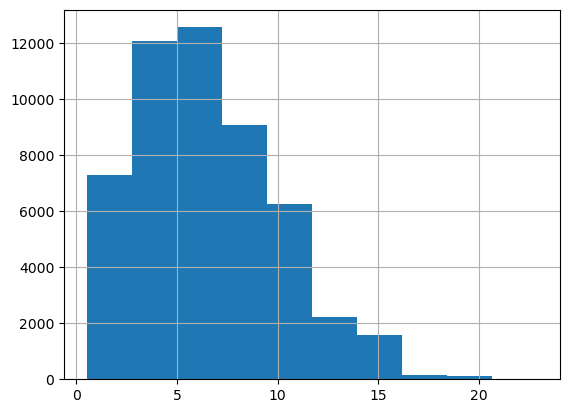

In [280]:
data['store_sales(in millions)'].hist()

In [281]:
data['log_store_sales']=np.log1p(data['store_sales(in millions)'])

<AxesSubplot:>

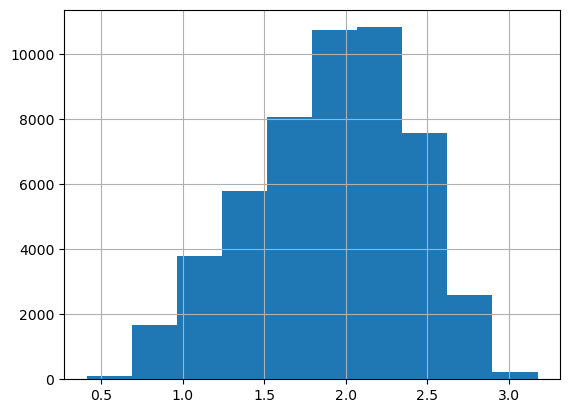

In [282]:
data['log_store_sales'].hist()

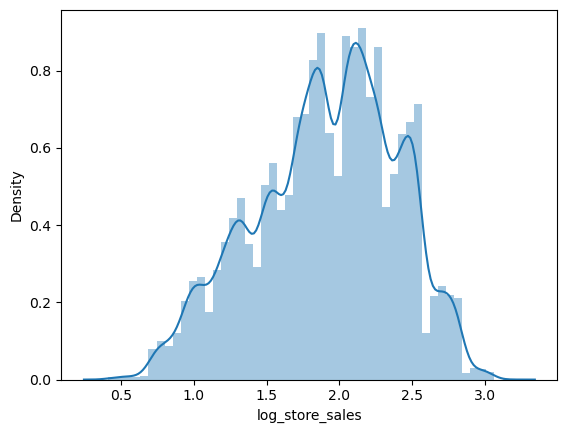

In [283]:
sns.distplot(data['log_store_sales'])
plt.show()

In [284]:
data['store_sales(in millions)'].skew()

0.6856368827812681

In [285]:
data['log_store_sales'].skew()

-0.31303593501045357

In [286]:
data.nunique()

store_sales(in millions)      1030
unit_sales(in millions)          6
total_children                   6
num_children_at_home             6
avg_cars_at home(approx).1       5
gross_weight                   376
recyclable_package               2
low_fat                          2
units_per_case                  36
store_sqft                      20
coffee_bar                       2
video_store                      2
salad_bar                        2
prepared_food                    2
florist                          2
cost                           328
log_store_sales               1030
dtype: int64

In [287]:
continious=['store_sales(in millions)','gross_weight','units_per_case', 'store_sqft','cost']

In [288]:
data.corr()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,log_store_sales
store_sales(in millions),1.000000,0.504557,0.083145,0.033257,0.007447,0.036006,0.032514,-0.006668,-0.006859,0.014484,-0.026551,0.019993,0.034281,0.034281,0.034651,-0.002531,0.962038
unit_sales(in millions),0.504557,1.000000,0.164080,0.067759,0.024719,-0.000349,0.001388,-0.005610,0.002176,0.033338,-0.058028,0.037600,0.060235,0.060235,0.058456,-0.014592,0.482603
total_children,0.083145,0.164080,1.000000,0.394318,0.095548,0.002342,0.001484,-0.002995,0.003613,-0.000753,0.003080,-0.000739,-0.014104,-0.014104,-0.003327,-0.006922,0.069498
num_children_at_home,0.033257,0.067759,0.394318,1.000000,0.131274,0.000251,0.001149,-0.001167,0.000197,0.006827,-0.016045,-0.014729,-0.024140,-0.024140,-0.009769,-0.005418,0.027613
avg_cars_at home(approx).1,0.007447,0.024719,0.095548,0.131274,1.000000,0.004487,0.005477,-0.004406,-0.007289,-0.017873,-0.003332,0.016385,-0.007490,-0.007490,-0.002681,0.014183,0.006502
gross_weight,0.036006,-0.000349,0.002342,0.000251,0.004487,1.000000,0.053347,-0.030498,-0.014652,-0.004687,0.003506,0.002531,0.004818,0.004818,0.003945,-0.002985,0.038746
recyclable_package,0.032514,0.001388,0.001484,0.001149,0.005477,0.053347,1.000000,-0.024311,-0.004360,0.001216,-0.001007,0.000873,0.002078,0.002078,-0.001566,-0.002936,0.030586
low_fat,-0.006668,-0.005610,-0.002995,-0.001167,-0.004406,-0.030498,-0.024311,1.000000,0.032691,0.004293,-0.003236,-0.007994,-0.000030,-0.000030,-0.000252,0.005739,-0.005554
units_per_case,-0.006859,0.002176,0.003613,0.000197,-0.007289,-0.014652,-0.004360,0.032691,1.000000,0.001184,0.003231,0.004664,0.005478,0.005478,0.003328,-0.003029,-0.010680
store_sqft,0.014484,0.033338,-0.000753,0.006827,-0.017873,-0.004687,0.001216,0.004293,0.001184,1.000000,-0.154928,-0.080162,0.405557,0.405557,-0.020324,-0.037818,0.018583


In [289]:
# column names
data.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost', 'log_store_sales'],
      dtype='object')

In [290]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51363 entries, 0 to 51362
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_sales(in millions)    51363 non-null  float64
 1   unit_sales(in millions)     51363 non-null  float64
 2   total_children              51363 non-null  float64
 3   num_children_at_home        51363 non-null  float64
 4   avg_cars_at home(approx).1  51363 non-null  float64
 5   gross_weight                51363 non-null  float64
 6   recyclable_package          51363 non-null  float64
 7   low_fat                     51363 non-null  float64
 8   units_per_case              51363 non-null  float64
 9   store_sqft                  51363 non-null  float64
 10  coffee_bar                  51363 non-null  float64
 11  video_store                 51363 non-null  float64
 12  salad_bar                   51363 non-null  float64
 13  prepared_food               513

In [291]:
# Check any Missing/Null value in the data frame?
data.isnull().sum().sum()

## There is no missing value in the data

0

In [292]:
data=data.drop_duplicates().reset_index(drop=True)

In [293]:
data.describe()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost,log_store_sales
count,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000,51328.000000
mean,6.531981,3.091217,2.538303,0.832294,2.199423,13.805998,0.558467,0.351114,18.855888,27979.016287,0.612278,0.353608,0.587905,0.587905,0.561721,99.329109,1.907681
std,3.465144,0.827387,1.489357,1.303889,1.109216,4.622391,0.496575,0.477323,10.263098,5701.854747,0.487235,0.478094,0.492217,0.492217,0.496181,30.024247,0.486648
min,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000,0.412110
25%,3.800000,3.000000,1.000000,0.000000,1.000000,9.700000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000,1.568616
50%,5.940000,3.000000,3.000000,0.000000,2.000000,13.600000,1.000000,0.000000,19.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000,1.937302
75%,8.640000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,30797.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000,2.265921
max,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000,3.174715


<Figure size 1500x1500 with 0 Axes>

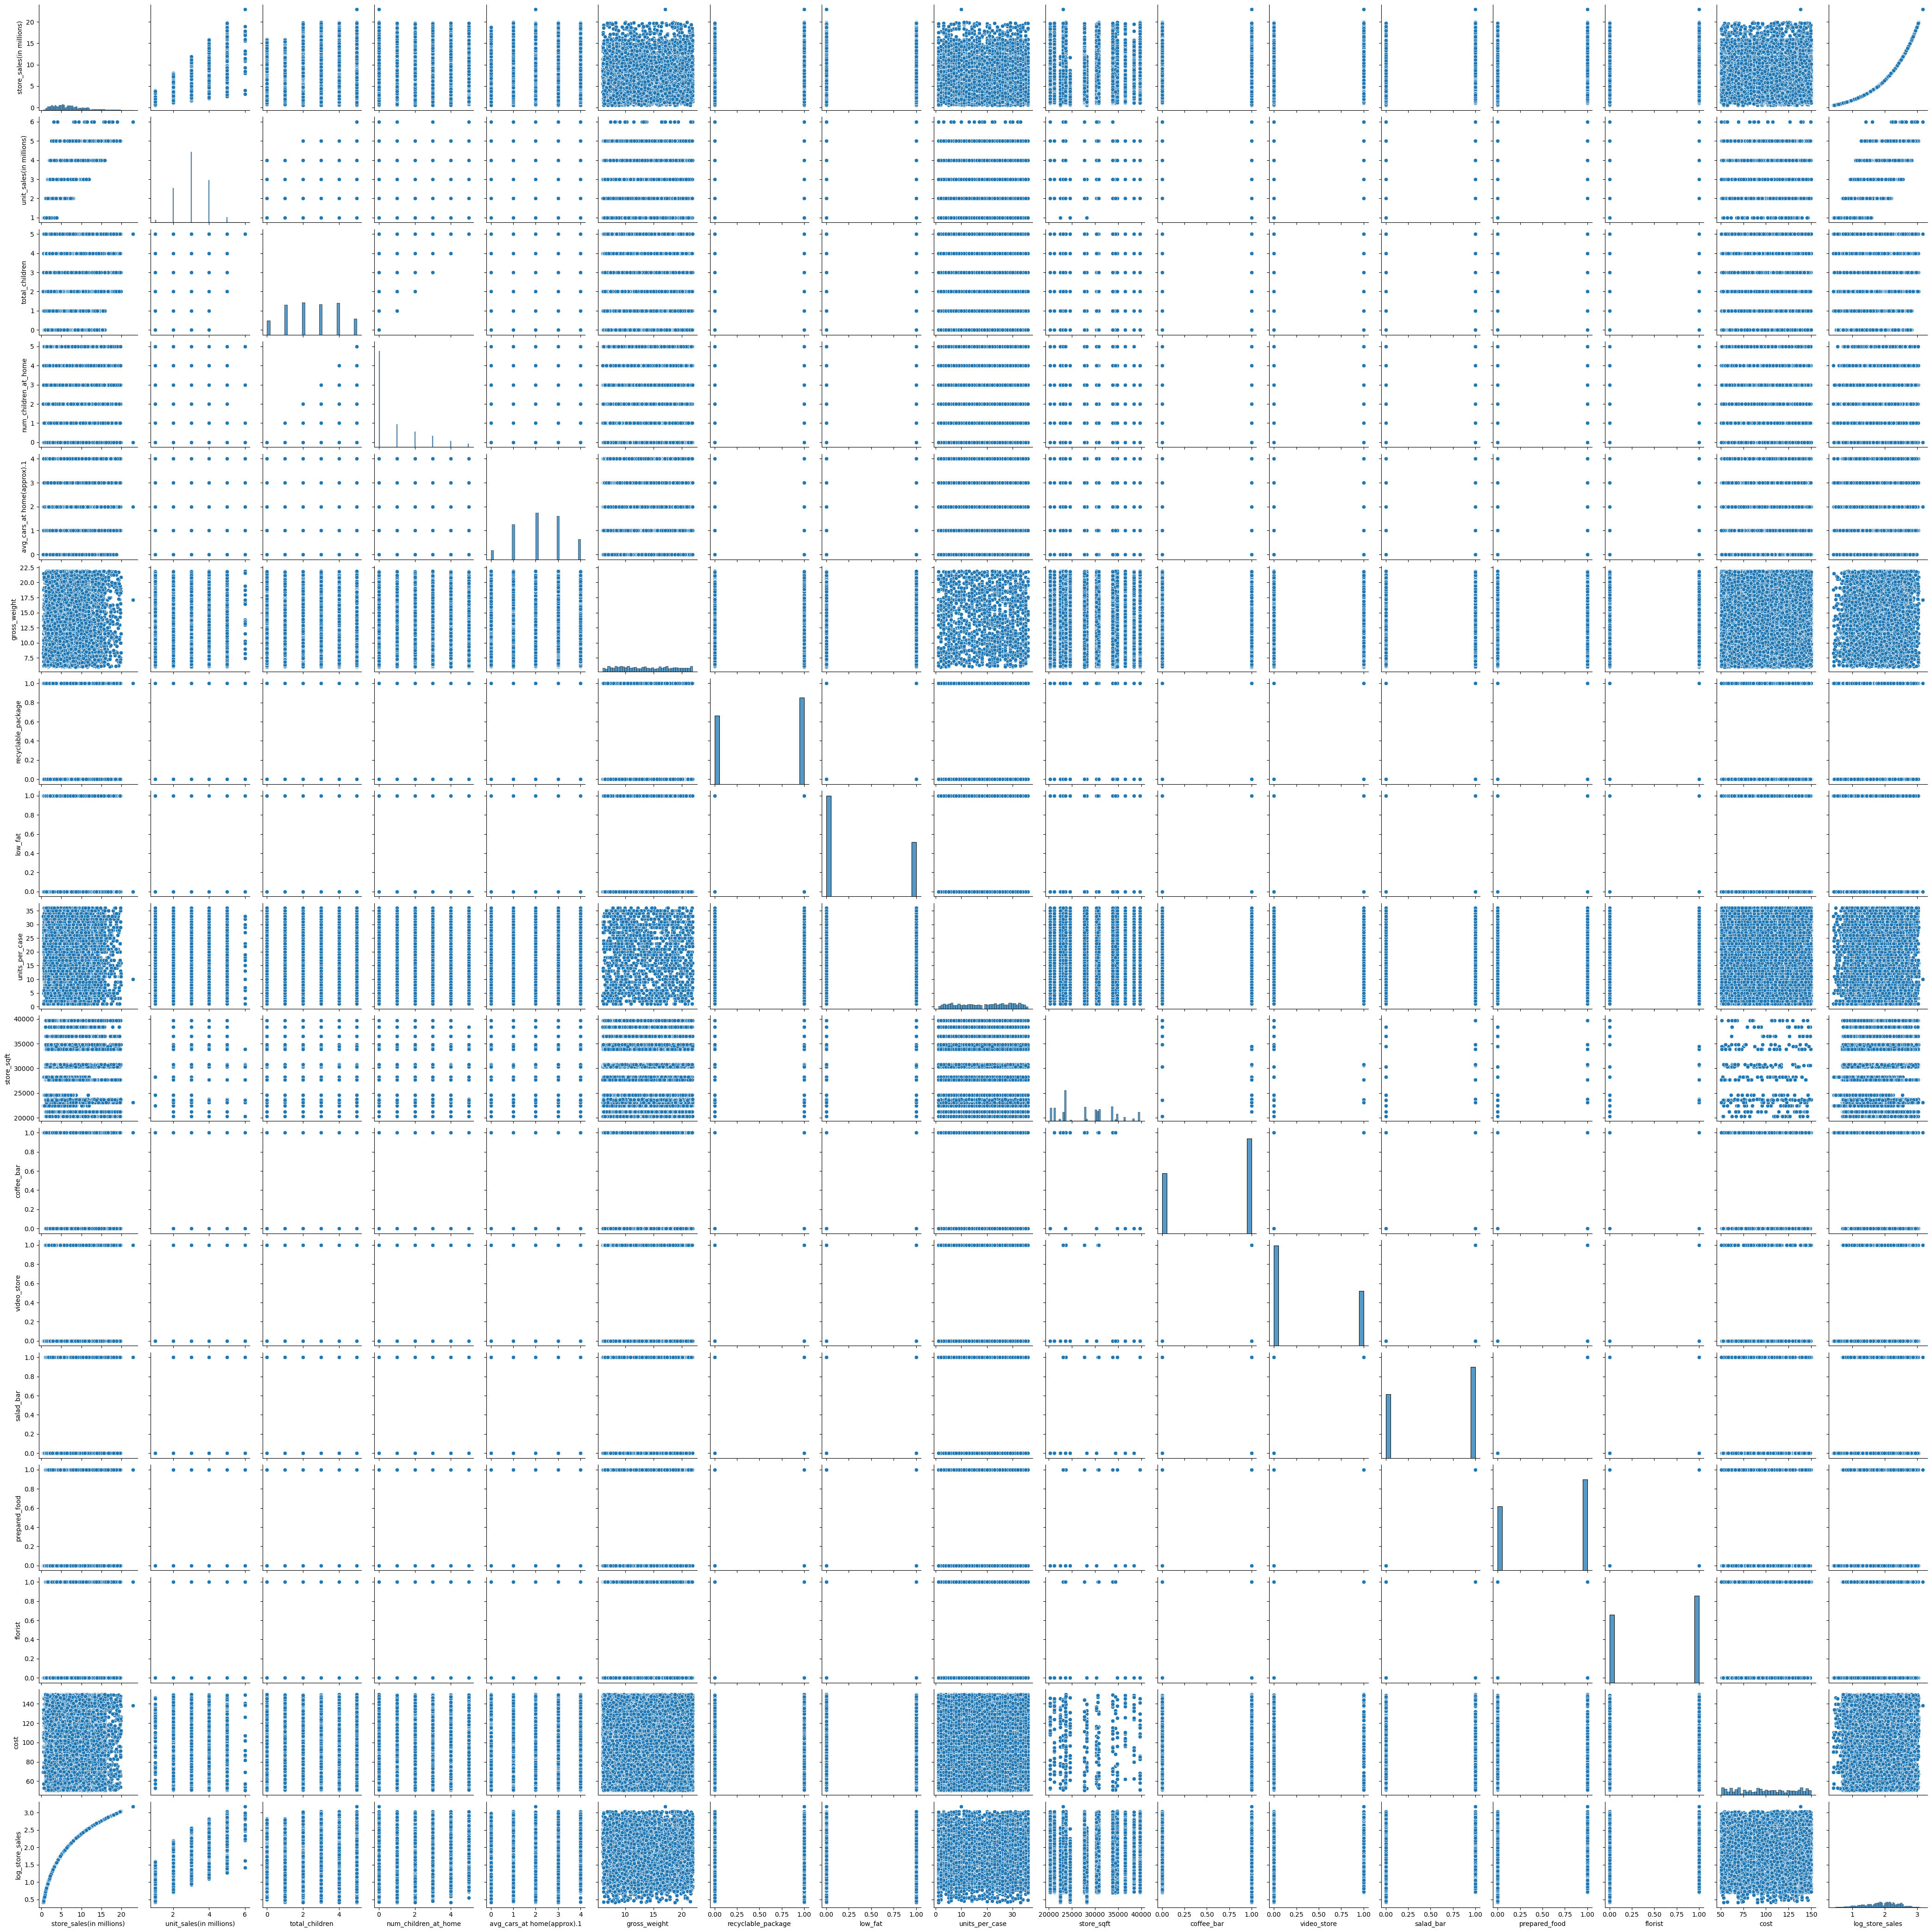

In [294]:
fig=plt.figure(figsize=(15,15))
sns.pairplot(data)
plt.show()

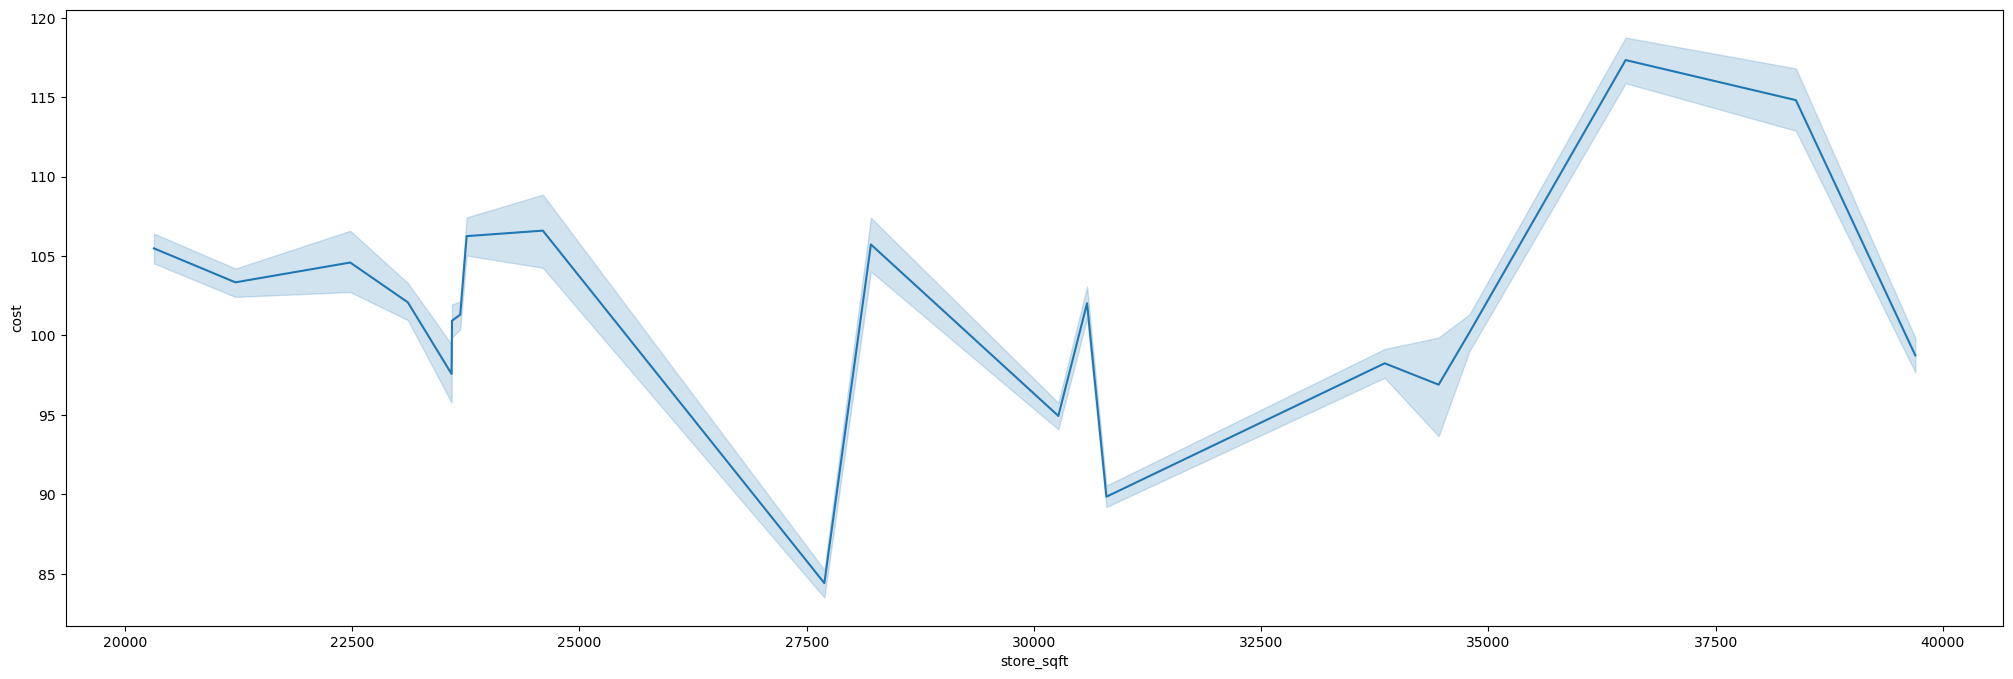

In [295]:
fig=plt.figure(figsize=(25,8))
sns.lineplot(data = data , x = 'store_sqft' , y ='cost')
plt.show()

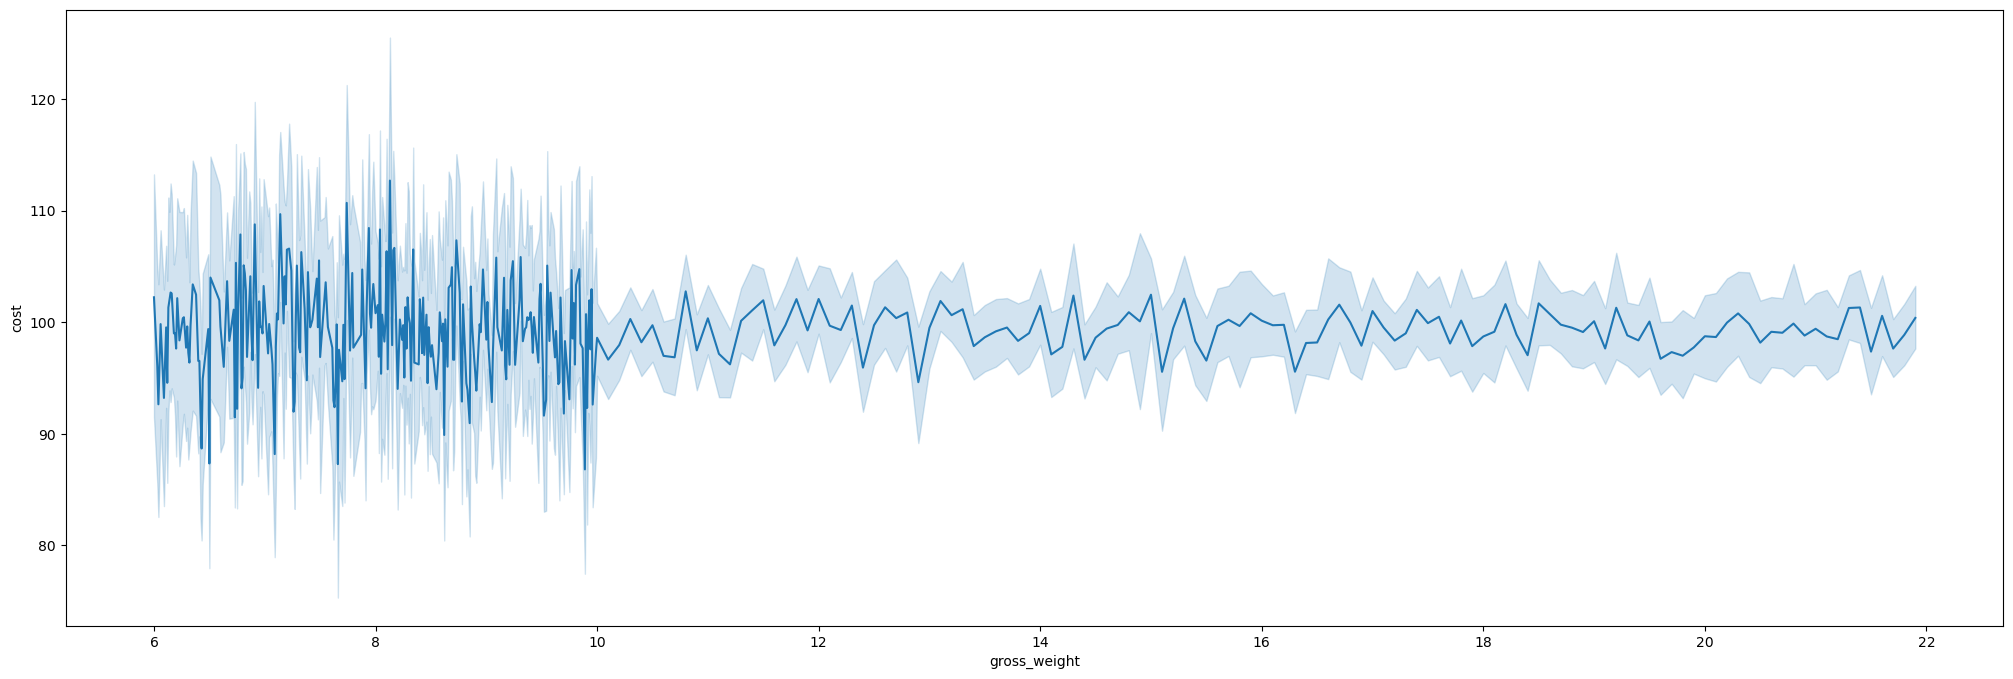

In [296]:
fig=plt.figure(figsize=(25,8))
sns.lineplot(data = data , x = 'gross_weight' , y ='cost')
plt.show()

<AxesSubplot:>

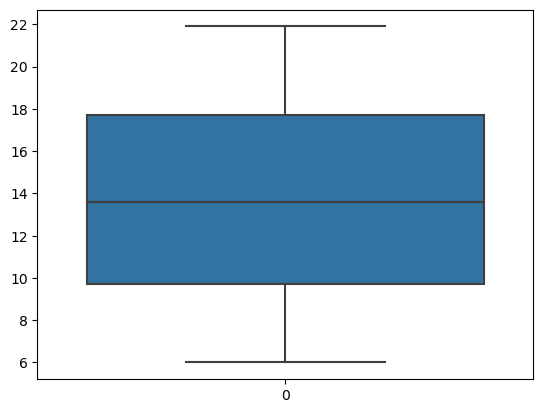

In [297]:
sns.boxplot(data=data['gross_weight'])

<AxesSubplot:>

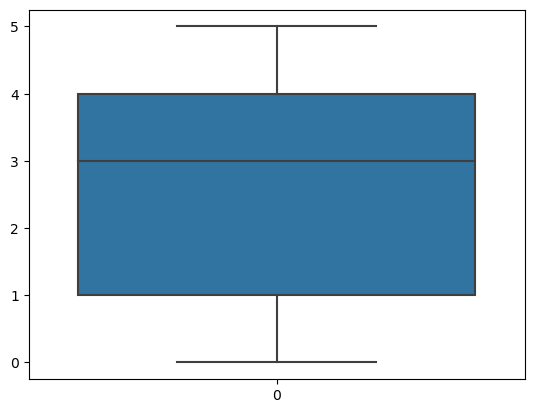

In [298]:
sns.boxplot(data=data['total_children'])

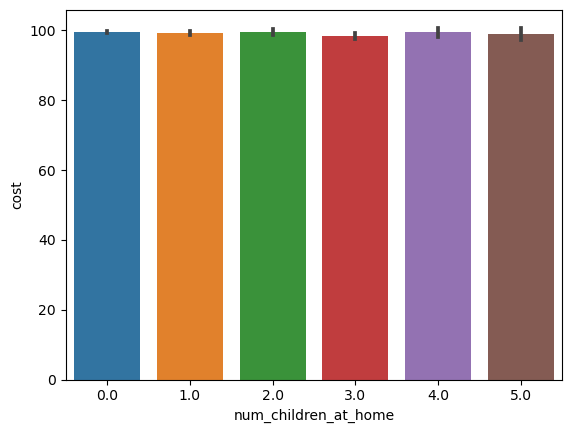

In [299]:
# Barplot
sns.barplot(data = data , x = 'num_children_at_home' , y ='cost')
plt.show()

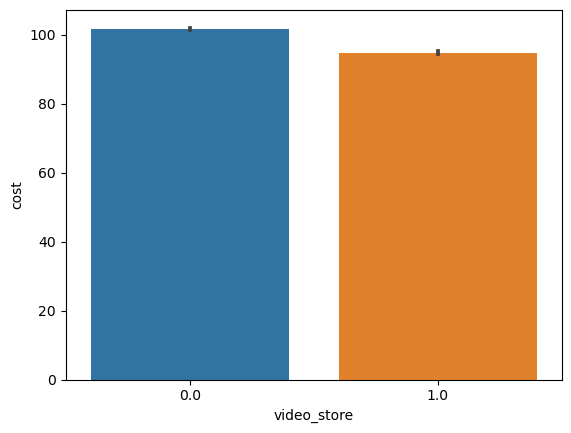

In [300]:
sns.barplot(data = data , x = 'video_store' , y ='cost')
plt.show()

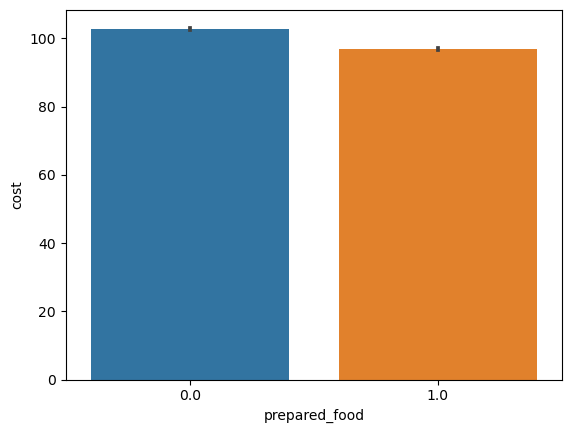

In [301]:
sns.barplot(data = data , x = 'prepared_food' , y ='cost')
plt.show()

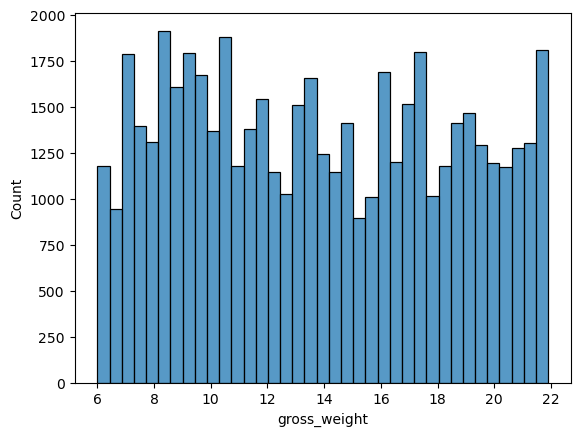

In [302]:
sns.histplot(data['gross_weight'])
plt.show()

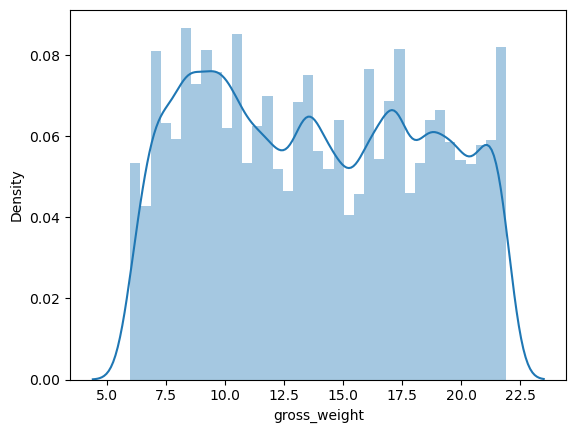

In [303]:
sns.distplot(data['gross_weight'])
plt.show()

In [304]:
data.columns

Index(['store_sales(in millions)', 'unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'cost', 'log_store_sales'],
      dtype='object')

In [305]:
data=data[['unit_sales(in millions)', 'total_children',
       'num_children_at_home', 'avg_cars_at home(approx).1', 'gross_weight',
       'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'log_store_sales', 'cost']]

In [306]:
col_names=['total_children', 'num_children_at_home', 'avg_cars_at home(approx).1','unit_sales(in millions)']
for col in col_names:
    data[col]= data[col].astype('O')

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51328 entries, 0 to 51327
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   unit_sales(in millions)     51328 non-null  object 
 1   total_children              51328 non-null  object 
 2   num_children_at_home        51328 non-null  object 
 3   avg_cars_at home(approx).1  51328 non-null  object 
 4   gross_weight                51328 non-null  float64
 5   recyclable_package          51328 non-null  float64
 6   low_fat                     51328 non-null  float64
 7   units_per_case              51328 non-null  float64
 8   store_sqft                  51328 non-null  float64
 9   coffee_bar                  51328 non-null  float64
 10  video_store                 51328 non-null  float64
 11  salad_bar                   51328 non-null  float64
 12  prepared_food               51328 non-null  float64
 13  florist                     513

In [308]:
data_dummy=pd.get_dummies(data, columns=['total_children', 'num_children_at_home', 'avg_cars_at home(approx).1','unit_sales(in millions)'])

In [309]:
data_dummy

,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,...,avg_cars_at home(approx).1_1.0,avg_cars_at home(approx).1_2.0,avg_cars_at home(approx).1_3.0,avg_cars_at home(approx).1_4.0,unit_sales(in millions)_1.0,unit_sales(in millions)_2.0,unit_sales(in millions)_3.0,unit_sales(in millions)_4.0,unit_sales(in millions)_5.0,unit_sales(in millions)_6.0
0,6.30,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,18.70,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,1,0,0,0
2,9.21,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
3,10.90,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
4,8.15,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51323,10.40,1.0,1.0,18.0,34452.0,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,1,0,0,0,0
51324,9.43,0.0,0.0,20.0,30797.0,1.0,1.0,1.0,1.0,1.0,...,0,1,0,0,0,0,0,1,0,0
51325,18.50,0.0,0.0,5.0,30797.0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
51326,19.80,0.0,1.0,8.0,23598.0,0.0,0.0,0.0,0.0,1.0,...,0,1,0,0,0,0,1,0,0,0


In [310]:
data_dummy.columns

Index(['gross_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food',
       'florist', 'log_store_sales', 'cost', 'total_children_0.0',
       'total_children_1.0', 'total_children_2.0', 'total_children_3.0',
       'total_children_4.0', 'total_children_5.0', 'num_children_at_home_0.0',
       'num_children_at_home_1.0', 'num_children_at_home_2.0',
       'num_children_at_home_3.0', 'num_children_at_home_4.0',
       'num_children_at_home_5.0', 'avg_cars_at home(approx).1_0.0',
       'avg_cars_at home(approx).1_1.0', 'avg_cars_at home(approx).1_2.0',
       'avg_cars_at home(approx).1_3.0', 'avg_cars_at home(approx).1_4.0',
       'unit_sales(in millions)_1.0', 'unit_sales(in millions)_2.0',
       'unit_sales(in millions)_3.0', 'unit_sales(in millions)_4.0',
       'unit_sales(in millions)_5.0', 'unit_sales(in millions)_6.0'],
      dtype='object')

In [311]:
#assigning variable
X = data_dummy.drop(['cost', 'gross_weight'], axis=1)
y = data_dummy['cost']

In [312]:
X

,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,log_store_sales,...,avg_cars_at home(approx).1_1.0,avg_cars_at home(approx).1_2.0,avg_cars_at home(approx).1_3.0,avg_cars_at home(approx).1_4.0,unit_sales(in millions)_1.0,unit_sales(in millions)_2.0,unit_sales(in millions)_3.0,unit_sales(in millions)_4.0,unit_sales(in millions)_5.0,unit_sales(in millions)_6.0
0,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,1.302913,...,0,1,0,0,0,1,0,0,0,0
1,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,1.906575,...,0,0,1,0,0,0,1,0,0,0
2,0.0,0.0,9.0,20319.0,0.0,0.0,0.0,0.0,0.0,1.286474,...,1,0,0,0,0,1,0,0,0,0
3,1.0,1.0,15.0,23112.0,1.0,1.0,1.0,1.0,1.0,2.543961,...,0,0,1,0,0,0,1,0,0,0
4,0.0,0.0,7.0,38382.0,0.0,0.0,0.0,0.0,0.0,1.761300,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51323,1.0,1.0,18.0,34452.0,1.0,0.0,0.0,0.0,1.0,1.547563,...,1,0,0,0,0,1,0,0,0,0
51324,0.0,0.0,20.0,30797.0,1.0,1.0,1.0,1.0,1.0,2.430098,...,0,1,0,0,0,0,0,1,0,0
51325,0.0,0.0,5.0,30797.0,1.0,1.0,1.0,1.0,1.0,2.500616,...,0,0,1,0,0,0,1,0,0,0
51326,0.0,1.0,8.0,23598.0,0.0,0.0,0.0,0.0,1.0,1.564441,...,0,1,0,0,0,0,1,0,0,0


In [313]:
y

0         79.59
1        118.36
2         67.20
3         60.87
4         86.79
          ...  
51323    147.17
51324     92.57
51325     92.57
51326    135.92
51327    129.50
Name: cost, Length: 51328, dtype: float64

In [329]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler

#columns_to_scale = [0, 3, 4]

# Initialize StandardScaler
sc = MinMaxScaler()

# Apply feature scaling to the specified columns in X_train
#X_train[:, columns_to_scale] = sc.fit_transform(X_train[:, columns_to_scale])

# Apply the same transformation to the specified columns in X_test
#X_test[:, columns_to_scale] = sc.transform(X_test[:, columns_to_scale])

X_scaled=sc.fit_transform(X)


In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

In [331]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
lr = model.fit(X_train, y_train)

In [332]:
y_pred= model.predict(X_test)

In [333]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.005167421059661392

In [319]:
result=pd.DataFrame()
result['cost']=y_test
result['predicted_cost']=np.round(y_pred)


In [320]:
result.head()

,cost,predicted_cost
13259,142.71,95.0
49166,90.77,94.0
44688,65.70,95.0
6781,62.40,92.0
41314,126.62,95.0


In [334]:
#Adding Intercept term to the model
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)

#Converting into Dataframe
X_train_d=pd.DataFrame(X_train)


#Printing the Model Statistics
model_train = sm.OLS(y_train,X_train).fit()
model_train.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     38.51
Date:                Thu, 11 Jan 2024   Prob (F-statistic):          7.81e-120
Time:                        18:23:10   Log-Likelihood:            -1.9762e+05
No. Observations:               41062   AIC:                         3.953e+05
Df Residuals:                   41045   BIC:                         3.954e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.6152      1.028     74.496      0.000      74.599      78.631
x1            -0.1630      0.296     -0.550      0.582      -0.744       0.418
x2             0.4357      0.308      1.413      0.158      -0.169       1.040
x3            -0.4661      0.502     -0.929      0.353      -1.449       0.517
x4            -3.1318      0.506     -6.185      0.000      -4.124      -2.139
x5             0.7559      0.956      0.791      0.429      -1.118       2.630
x6            13.4144      0.555     24.180      0.000      12.327      14.502
x7            15.0460      0.357     42.181      0.000      14.347      15.745
x8            16.6518      0.332     50.231      0.000      16.002      17.302
x9            15.8368      0.341     46.460      0.000      15.169      16.505
x10           15.6662      0.416     37.681      0.000      14.851      16.481
x11           14.9004      1.502      9.921      0.000      11.957      17.844
x12           12.4885      1.118     11.168      0.000      10.297      14.680
x13           12.1374      1.102     11.012      0.000       9.977      14.298
x14           11.5350      1.118     10.315      0.000       9.343      13.727
x15           12.2558      1.290      9.503      0.000       9.728      14.784
x16           13.2982      6.189      2.149      0.032       1.168      25.428
x17            0.5549      0.494      1.124      0.261      -0.413       1.522
x18           -7.7650      0.360    -21.567      0.000      -8.471      -7.059
==============================================================================
Omnibus:                    35151.656   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2457.288
Skew:                           0.034   Prob(JB):                         0.00
Kurtosis:                       1.803   Cond. No.                     2.04e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [322]:
X.columns

Index(['recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'log_store_sales', 'total_children_0.0', 'total_children_1.0',
       'total_children_2.0', 'total_children_3.0', 'total_children_4.0',
       'total_children_5.0', 'num_children_at_home_0.0',
       'num_children_at_home_1.0', 'num_children_at_home_2.0',
       'num_children_at_home_3.0', 'num_children_at_home_4.0',
       'num_children_at_home_5.0', 'avg_cars_at home(approx).1_0.0',
       'avg_cars_at home(approx).1_1.0', 'avg_cars_at home(approx).1_2.0',
       'avg_cars_at home(approx).1_3.0', 'avg_cars_at home(approx).1_4.0',
       'unit_sales(in millions)_1.0', 'unit_sales(in millions)_2.0',
       'unit_sales(in millions)_3.0', 'unit_sales(in millions)_4.0',
       'unit_sales(in millions)_5.0', 'unit_sales(in millions)_6.0'],
      dtype='object')

In [323]:
# Create a list of columns related to the number of children
children_columns = ['total_children_0.0', 'total_children_1.0', 'total_children_2.0',
                    'total_children_3.0', 'total_children_4.0', 'total_children_5.0', 'total_children_5.0', 'num_children_at_home_0.0',
       'num_children_at_home_1.0', 'num_children_at_home_2.0',
       'num_children_at_home_3.0', 'num_children_at_home_4.0',
       'num_children_at_home_5.0',]

# Create the 'any_child' column by summing up the number of children columns
X['no_of_child'] = X[children_columns].sum(axis=1)



In [324]:
X.columns

Index(['recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist',
       'log_store_sales', 'total_children_0.0', 'total_children_1.0',
       'total_children_2.0', 'total_children_3.0', 'total_children_4.0',
       'total_children_5.0', 'num_children_at_home_0.0',
       'num_children_at_home_1.0', 'num_children_at_home_2.0',
       'num_children_at_home_3.0', 'num_children_at_home_4.0',
       'num_children_at_home_5.0', 'avg_cars_at home(approx).1_0.0',
       'avg_cars_at home(approx).1_1.0', 'avg_cars_at home(approx).1_2.0',
       'avg_cars_at home(approx).1_3.0', 'avg_cars_at home(approx).1_4.0',
       'unit_sales(in millions)_1.0', 'unit_sales(in millions)_2.0',
       'unit_sales(in millions)_3.0', 'unit_sales(in millions)_4.0',
       'unit_sales(in millions)_5.0', 'unit_sales(in millions)_6.0',
       'no_of_child'],
      dtype='object')

In [325]:
X['no_of_child']

0        2
1        3
2        2
3        2
4        2
        ..
51323    2
51324    2
51325    2
51326    2
51327    2
Name: no_of_child, Length: 51328, dtype: int64

In [326]:
# Create a list of columns related to facility
facility_columns = [ 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']

# Create the 'no_of_facility' column by summing up the number of facility columns
X['no_of_facility'] = X[facility_columns ].sum(axis=1)


In [327]:
X = X.drop([ 'total_children_0.0',
       'total_children_1.0', 'total_children_2.0', 'total_children_3.0',
       'total_children_4.0', 'total_children_5.0', 'num_children_at_home_0.0',
       'num_children_at_home_1.0', 'num_children_at_home_2.0',
       'num_children_at_home_3.0', 'num_children_at_home_4.0',
       'num_children_at_home_5.0', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'], axis=1)

In [328]:
X.columns

Index(['recyclable_package', 'low_fat', 'units_per_case', 'store_sqft',
       'log_store_sales', 'avg_cars_at home(approx).1_0.0',
       'avg_cars_at home(approx).1_1.0', 'avg_cars_at home(approx).1_2.0',
       'avg_cars_at home(approx).1_3.0', 'avg_cars_at home(approx).1_4.0',
       'unit_sales(in millions)_1.0', 'unit_sales(in millions)_2.0',
       'unit_sales(in millions)_3.0', 'unit_sales(in millions)_4.0',
       'unit_sales(in millions)_5.0', 'unit_sales(in millions)_6.0',
       'no_of_child', 'no_of_facility'],
      dtype='object')